<a href="https://colab.research.google.com/github/sohil344/EDA/blob/main/Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [5]:
df=pd.read_csv('/content/titanic_train.csv',usecols=['age','fare','survived'])

In [6]:
df

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0
...,...,...,...
845,55.0,50.0000,0
846,58.0,29.7000,0
847,24.0,26.0000,1
848,3.0,13.7750,0


In [7]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [9]:
df['fare'].fillna(df['fare'].mean(),inplace=True)

In [10]:
df.isnull().sum()

age         0
fare        0
survived    0
dtype: int64

In [11]:
X=df.iloc[:,:2]
y=df.iloc[:,-1]

In [12]:
y

0      1
1      0
2      0
3      1
4      0
      ..
845    0
846    0
847    1
848    0
849    0
Name: survived, Length: 850, dtype: int64

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


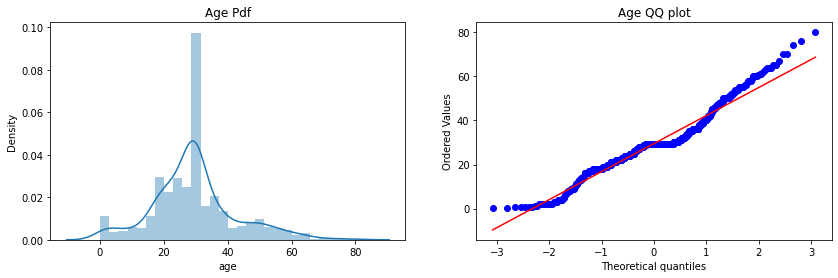

In [20]:

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['age'])
plt.title('Age Pdf')

plt.subplot(122)
stats.probplot(X_train['age'],dist='norm',plot=plt)
plt.title('Age QQ plot')

plt.show()

#Close but Not normally distributed 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


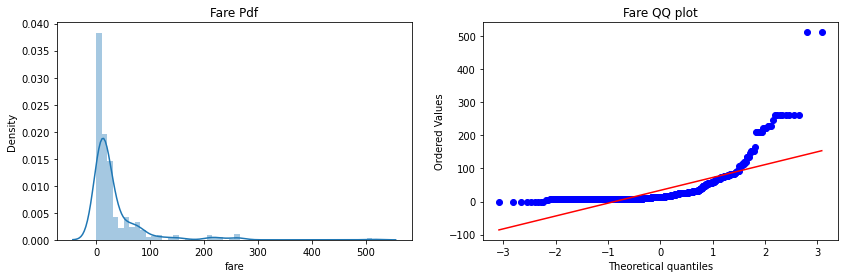

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['fare'])
plt.title('Fare Pdf')

plt.subplot(122)
stats.probplot(X_train['fare'],dist='norm',plot=plt)
plt.title('Fare QQ plot')

plt.show()

#Its is extremely right skewed we can use log transformation

In [23]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [24]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred_1=clf1.predict(X_test)
y_pred_2=clf2.predict(X_test)

In [26]:
print("Accuracy of LR",accuracy_score(y_test,y_pred_1))
print("Accuracy of DT",accuracy_score(y_test,y_pred_2))

Accuracy of LR 0.6352941176470588
Accuracy of DT 0.5882352941176471


In [27]:
trf=FunctionTransformer(func=np.log1p)

In [28]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.fit_transform(X_test)

In [29]:
clf1.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [30]:
y_pred_1=clf1.predict(X_test_transformed)
y_pred_2=clf2.predict(X_test_transformed)

In [31]:
print("Accuracy of LR",accuracy_score(y_test,y_pred_1))
print("Accuracy of DT",accuracy_score(y_test,y_pred_2))

Accuracy of LR 0.6705882352941176
Accuracy of DT 0.6


In [33]:
#Cross Validation to check and confirm our model accuracy

X_transformed=trf.fit_transform(X)
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf1,X_transformed,y,scoring='accuracy',cv=10)))
print('DT',np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.6705882352941177
DT 0.6529411764705882


Text(0.5, 1.0, 'Age After transform')

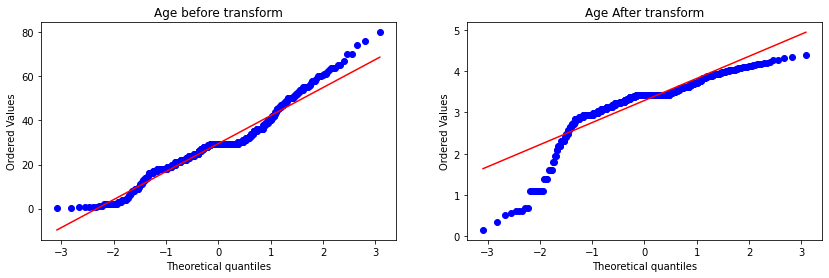

In [36]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['age'],dist='norm',plot=plt)
plt.title('Age before transform')

plt.subplot(122)
stats.probplot(X_train_transformed['age'],dist='norm',plot=plt)
plt.title('Age After transform')

Text(0.5, 1.0, 'Fare After transform')

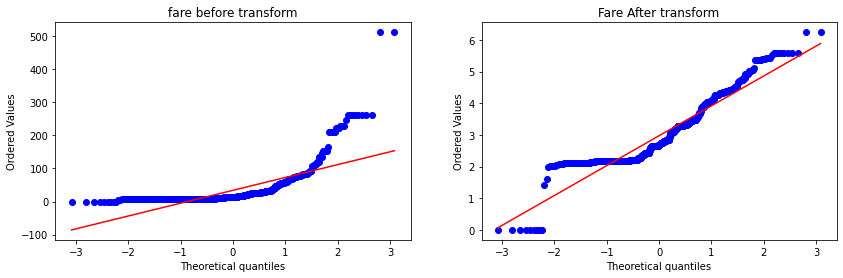

In [38]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['fare'],dist='norm',plot=plt)
plt.title('fare before transform')

plt.subplot(122)
stats.probplot(X_train_transformed['fare'],dist='norm',plot=plt)
plt.title('Fare After transform')

In [41]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['fare'])],remainder='passthrough')

X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.fit_transform(X_test)

In [44]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

clf1.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred1=clf1.predict(X_test_transformed2)
y_pred2=clf2.predict(X_test_transformed2)

In [45]:
print("Accuracy of LR",accuracy_score(y_test,y_pred1))
print("Accuracy of DT",accuracy_score(y_test,y_pred2))

Accuracy of LR 0.6529411764705882
Accuracy of DT 0.611764705882353


In [71]:
def apply_transform(transform):
  X=df.iloc[:,:2]
  y=df.iloc[:,-1]

  trf=ColumnTransformer([('log',FunctionTransformer(transform),['fare'])],remainder='passthrough')

  X_trans=trf.fit_transform(X)

  clf=LogisticRegression()

  print('LR',np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))


  plt.figure(figsize=(14,4))

  plt.subplot(121)
  stats.probplot(X['fare'],dist='norm',plot=plt)
  plt.title('fare before transform')
  print(X_trans[0])
  plt.subplot(122)
  stats.probplot(X_trans[:,0],dist='norm',plot=plt)
  plt.title('Fare After transform')

  plt.show()


LR 0.40823529411764703
[462.48172329  29.51984719]


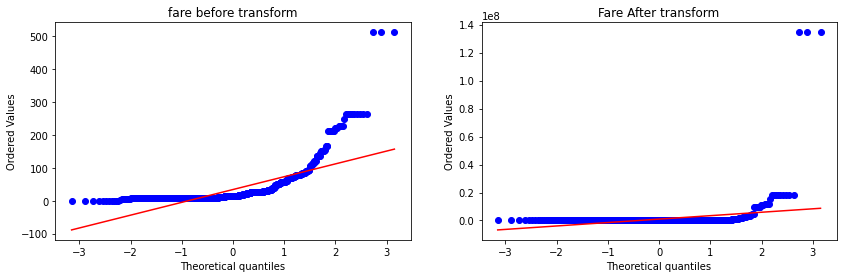

In [72]:
apply_transform(lambda x:(x**3))